In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme()


In [2]:
def number_to_int(x):
    if x == '-':
        return None
    if x.endswith('K'):
        return int(x[:-1]) * 1000
    if x.endswith('M'):
        return int(x[:-1]) * 1000*1000
    if x.endswith('B'):
        return int(x[:-1]) * 1000*1000*1000
    return int(x)


data = pd.read_csv('networkrep.txt', 
                   names=["category", "nodes", "edges", "dmax"], header=None,
                   usecols=[0, 1, 2, 3],
                   skiprows=1,
                    sep='\t', na_values='-', converters={'nodes': number_to_int, 'edges': number_to_int})

data.dropna()

data["density"] = 2 * data["edges"] / data["nodes"] / (data["nodes"] + 1)

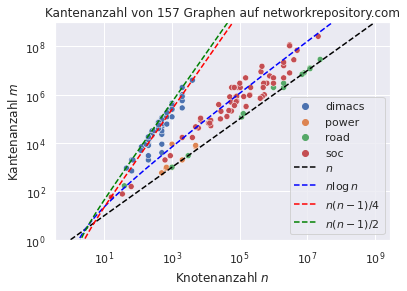

In [3]:
for thin in [False, True]:
    view = data[(data["density"] < 1) * (data["density"] > 1e-9)]
    if thin:
        view = view[view.category.map(lambda x: x in ["soc", "road", "power", "dimacs"])]

    plt.cla()
    sns.scatterplot(data=view, x="nodes", y="edges", hue="category", legend=thin)
    plt.xlabel("Knotenanzahl $n$")
    plt.ylabel("Kantenanzahl $m$")
    plt.title("Kantenanzahl von %d Graphen auf networkrepository.com" % (len(view)))
    plt.loglog()

    xs = np.logspace(0, 9, 100)
    logxs = np.log(xs)*xs
    logxs[logxs < 1] = None

    plt.plot(xs, xs, color='black', linestyle='--', label="$n$")
    plt.plot(xs, logxs, color='blue', linestyle='--', label=r"$n \log n$")
    plt.plot(xs, xs*(xs-1)/4, color='red', linestyle='--', label=r"$n(n-1) / 4$")
    plt.plot(xs, xs*(xs-1)/2, color='green', linestyle='--', label=r"$n(n-1) / 2$")
    plt.ylim(1, 1e9)
    plt.legend(loc='lower right')
    plt.savefig("network-rep-edges%s.pdf" % ("-thin" if thin else ""), bbox_inches='tight')